# Importing data and libraries

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd /kaggle/input/titanic

/kaggle/input/titanic


In [3]:
df=pd.read_csv("train.csv",na_values=['.',':','?','!','@','#','$','%','^','&','*',','])

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#checking for cardinality

df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
#Dropping unnecessary variables and saving into a dataframe

df = df.drop(["Name","Ticket","Fare","Cabin","PassengerId"], axis=1)

In [8]:
#checking for null values

df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [9]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [11]:
# Changing data types into categorical

for col in ['Pclass','Sex','Survived','Embarked']:
    df[col] = df[col].astype('category')

In [12]:
df.dtypes

Survived    category
Pclass      category
Sex         category
Age          float64
SibSp          int64
Parch          int64
Embarked    category
dtype: object

# Spliting data into category and numerical columns

In [13]:
cat_cols=['Pclass', 'Sex','Embarked']

In [14]:
num_cols=['Age','SibSp', 'Parch']

In [15]:
cat_cols

['Pclass', 'Sex', 'Embarked']

In [16]:
num_cols

['Age', 'SibSp', 'Parch']

In [17]:
df[num_cols].describe()

,Age,SibSp,Parch
count,714.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594
std,14.526497,1.102743,0.806057
min,0.420000,0.000000,0.000000
25%,20.125000,0.000000,0.000000
50%,28.000000,0.000000,0.000000
75%,38.000000,1.000000,0.000000
max,80.000000,8.000000,6.000000


# Splitting data into Train and Validation

In [18]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop('Survived',axis=1)
y= df['Survived']

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [21]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(623, 6)
(268, 6)
(623,)
(268,)


In [22]:
df["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [23]:
y_train.value_counts(normalize=True)

0    0.616372
1    0.383628
Name: Survived, dtype: float64

In [24]:
y_val.value_counts(normalize=True)

0    0.615672
1    0.384328
Name: Survived, dtype: float64

# Imputation

In [25]:
from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(strategy='median')
imputer_num = imputer_num.fit(X_train[num_cols])
X_train_num_imp = pd.DataFrame(imputer_num.transform(X_train[num_cols]), columns=(X_train[num_cols]).columns)
X_val_num_imp = pd.DataFrame(imputer_num.transform(X_val[num_cols]), columns=(X_val[num_cols]).columns)

In [26]:
X_train_num_imp.isnull().sum()

Age      0
SibSp    0
Parch    0
dtype: int64

In [27]:
X_val_num_imp.isnull().sum()

Age      0
SibSp    0
Parch    0
dtype: int64

In [28]:
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat = imputer_cat.fit(X_train[cat_cols])
X_train_cat_imp = pd.DataFrame(imputer_cat.transform(X_train[cat_cols]), columns=(X_train[cat_cols]).columns)
X_val_cat_imp = pd.DataFrame(imputer_cat.transform(X_val[cat_cols]), columns=(X_val[cat_cols]).columns)

In [29]:
X_train_cat_imp.isnull().sum()

Pclass      0
Sex         0
Embarked    0
dtype: int64

In [30]:
X_val_cat_imp.isnull().sum()

Pclass      0
Sex         0
Embarked    0
dtype: int64

# Standardization

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X_train[num_cols])
X_train_num_std = pd.DataFrame(scaler.transform(X_train_num_imp), columns=X_train_num_imp.columns)
X_val_num_std = pd.DataFrame(scaler.transform(X_val_num_imp), columns=X_val_num_imp.columns)

# Dummification

In [32]:
X_train_cat_dum = pd.get_dummies((X_train_cat_imp),drop_first=True)
X_val_cat_dum = pd.get_dummies((X_val_cat_imp),drop_first=True)

In [33]:
X_train_cat_dum

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,0,0,1
1,0,1,1,1,0
2,0,1,0,1,0
3,0,1,1,0,1
4,0,1,1,1,0
...,...,...,...,...,...
618,0,0,1,0,0
619,0,1,1,0,1
620,0,0,0,0,1
621,0,0,1,1,0


In [34]:
X_val_cat_dum

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,1,0,1
1,0,0,0,0,1
2,0,1,1,1,0
3,0,1,1,0,1
4,1,0,1,0,1
...,...,...,...,...,...
263,0,1,1,0,1
264,1,0,0,0,1
265,0,1,1,0,1
266,0,0,1,0,1


In [35]:
X_train_num_std = X_train_num_std.reset_index()
X_train_num_std

,index,Age,SibSp,Parch
0,0,-0.349638,-0.464774,-0.465958
1,1,-0.137370,-0.464774,-0.465958
2,2,-0.137370,-0.464774,-0.465958
3,3,-0.915685,-0.464774,-0.465958
4,4,-0.137370,-0.464774,-0.465958
...,...,...,...,...
618,618,0.428678,-0.464774,-0.465958
619,619,0.782458,0.412663,4.582592
620,620,-0.137370,0.412663,-0.465958
621,621,1.065482,1.290100,-0.465958


In [36]:
X_train_num_std = X_train_num_std.drop(["index"], axis=1)
X_train_num_std

,Age,SibSp,Parch
0,-0.349638,-0.464774,-0.465958
1,-0.137370,-0.464774,-0.465958
2,-0.137370,-0.464774,-0.465958
3,-0.915685,-0.464774,-0.465958
4,-0.137370,-0.464774,-0.465958
...,...,...,...
618,0.428678,-0.464774,-0.465958
619,0.782458,0.412663,4.582592
620,-0.137370,0.412663,-0.465958
621,1.065482,1.290100,-0.465958


In [37]:
X_val_num_std = X_val_num_std.reset_index()
X_val_num_std

,index,Age,SibSp,Parch
0,0,0.074898,-0.464774,-0.465958
1,1,-0.137370,0.412663,-0.465958
2,2,-1.906269,3.044974,0.796180
3,3,-0.137370,-0.464774,-0.465958
4,4,-0.561906,1.290100,-0.465958
...,...,...,...,...
263,263,0.216410,-0.464774,-0.465958
264,264,-0.349638,0.412663,2.058317
265,265,0.853214,1.290100,-0.465958
266,266,1.490018,1.290100,-0.465958


In [38]:
X_val_num_std = X_val_num_std.drop(["index"], axis=1)
X_val_num_std

,Age,SibSp,Parch
0,0.074898,-0.464774,-0.465958
1,-0.137370,0.412663,-0.465958
2,-1.906269,3.044974,0.796180
3,-0.137370,-0.464774,-0.465958
4,-0.561906,1.290100,-0.465958
...,...,...,...
263,0.216410,-0.464774,-0.465958
264,-0.349638,0.412663,2.058317
265,0.853214,1.290100,-0.465958
266,1.490018,1.290100,-0.465958


In [39]:
X_train_cat_dum = X_train_cat_dum.reset_index()
X_train_cat_dum

,index,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1,0,0,0,1
1,1,0,1,1,1,0
2,2,0,1,0,1,0
3,3,0,1,1,0,1
4,4,0,1,1,1,0
...,...,...,...,...,...,...
618,618,0,0,1,0,0
619,619,0,1,1,0,1
620,620,0,0,0,0,1
621,621,0,0,1,1,0


In [40]:
X_train_cat_dum = X_train_cat_dum.drop(["index"], axis=1)
X_train_cat_dum

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,0,0,1
1,0,1,1,1,0
2,0,1,0,1,0
3,0,1,1,0,1
4,0,1,1,1,0
...,...,...,...,...,...
618,0,0,1,0,0
619,0,1,1,0,1
620,0,0,0,0,1
621,0,0,1,1,0


In [41]:
X_val_cat_dum = X_val_cat_dum.reset_index()
X_val_cat_dum

,index,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1,0,1,0,1
1,1,0,0,0,0,1
2,2,0,1,1,1,0
3,3,0,1,1,0,1
4,4,1,0,1,0,1
...,...,...,...,...,...,...
263,263,0,1,1,0,1
264,264,1,0,0,0,1
265,265,0,1,1,0,1
266,266,0,0,1,0,1


In [42]:
X_val_cat_dum = X_val_cat_dum.drop(["index"], axis=1)
X_val_cat_dum

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,1,0,1
1,0,0,0,0,1
2,0,1,1,1,0
3,0,1,1,0,1
4,1,0,1,0,1
...,...,...,...,...,...
263,0,1,1,0,1
264,1,0,0,0,1
265,0,1,1,0,1
266,0,0,1,0,1


# Concating

In [43]:
final_X_train = pd.concat([X_train_num_std, X_train_cat_dum], axis=1)

In [44]:
final_X_val = pd.concat([X_val_num_std, X_val_cat_dum], axis=1)

In [45]:
final_X_train.isnull().sum()

Age           0
SibSp         0
Parch         0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [46]:
final_X_val.isnull().sum()

Age           0
SibSp         0
Parch         0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [47]:
final_X_train

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.349638,-0.464774,-0.465958,1,0,0,0,1
1,-0.137370,-0.464774,-0.465958,0,1,1,1,0
2,-0.137370,-0.464774,-0.465958,0,1,0,1,0
3,-0.915685,-0.464774,-0.465958,0,1,1,0,1
4,-0.137370,-0.464774,-0.465958,0,1,1,1,0
...,...,...,...,...,...,...,...,...
618,0.428678,-0.464774,-0.465958,0,0,1,0,0
619,0.782458,0.412663,4.582592,0,1,1,0,1
620,-0.137370,0.412663,-0.465958,0,0,0,0,1
621,1.065482,1.290100,-0.465958,0,0,1,1,0


In [48]:
final_X_val

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.074898,-0.464774,-0.465958,1,0,1,0,1
1,-0.137370,0.412663,-0.465958,0,0,0,0,1
2,-1.906269,3.044974,0.796180,0,1,1,1,0
3,-0.137370,-0.464774,-0.465958,0,1,1,0,1
4,-0.561906,1.290100,-0.465958,1,0,1,0,1
...,...,...,...,...,...,...,...,...
263,0.216410,-0.464774,-0.465958,0,1,1,0,1
264,-0.349638,0.412663,2.058317,1,0,0,0,1
265,0.853214,1.290100,-0.465958,0,1,1,0,1
266,1.490018,1.290100,-0.465958,0,0,1,0,1


# Model Building

## Decision Tree

In [49]:
from sklearn import tree

In [50]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(final_X_train, y_train)

In [51]:
y_train_preds = dt.predict(final_X_train)
y_train_preds[0:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [52]:
y_val_preds = dt.predict(final_X_val)
y_val_preds[0:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [53]:
from sklearn.metrics import confusion_matrix
confusionmatrix = confusion_matrix(y_train,y_train_preds)
confusionmatrix

array([[380,   4],
       [ 35, 204]])

In [54]:
confusionmatrix = confusion_matrix(y_val,y_val_preds)
confusionmatrix

array([[142,  23],
       [ 37,  66]])

In [55]:
from sklearn import metrics
print(metrics.classification_report(y_train,y_train_preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       384
           1       0.98      0.85      0.91       239

    accuracy                           0.94       623
   macro avg       0.95      0.92      0.93       623
weighted avg       0.94      0.94      0.94       623



In [56]:
print(metrics.classification_report(y_val,y_val_preds))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       165
           1       0.74      0.64      0.69       103

    accuracy                           0.78       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.78      0.77       268



# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc = RandomForestClassifier(n_estimators = 50, max_depth = 10, criterion="entropy")
rfc = rfc.fit(final_X_train, y_train)

In [59]:
y_train_preds = rfc.predict(final_X_train)
y_train_preds[0:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [60]:
y_val_preds = rfc.predict(final_X_val)
y_val_preds[0:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [61]:
from sklearn.metrics import confusion_matrix
confusionma2trix = confusion_matrix(y_train,y_train_preds)
confusionmatrix

array([[142,  23],
       [ 37,  66]])

In [62]:
confusionmatrix = confusion_matrix(y_val,y_val_preds)
confusionmatrix

array([[155,  10],
       [ 36,  67]])

In [63]:
from sklearn import metrics
print(metrics.classification_report(y_train,y_train_preds))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       384
           1       0.97      0.82      0.89       239

    accuracy                           0.92       623
   macro avg       0.94      0.90      0.91       623
weighted avg       0.93      0.92      0.92       623



In [64]:
print(metrics.classification_report(y_val,y_val_preds))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       165
           1       0.87      0.65      0.74       103

    accuracy                           0.83       268
   macro avg       0.84      0.79      0.81       268
weighted avg       0.83      0.83      0.82       268



## XG Booost

In [65]:
from xgboost import XGBClassifier

In [66]:
xgb = XGBClassifier()
xgb = xgb.fit(final_X_train, y_train)

In [67]:
y_train_preds = xgb.predict(final_X_train)
y_train_preds[0:10]

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [68]:
y_val_preds = xgb.predict(final_X_val)
y_val_preds[0:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [69]:
from sklearn.metrics import confusion_matrix
confusionmatrix = confusion_matrix(y_train,y_train_preds)
confusionmatrix

array([[371,  13],
       [ 40, 199]])

In [70]:
confusionmatrix = confusion_matrix(y_val,y_val_preds)
confusionmatrix

array([[141,  24],
       [ 34,  69]])

In [71]:
from sklearn import metrics
print(metrics.classification_report(y_train,y_train_preds))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       384
           1       0.94      0.83      0.88       239

    accuracy                           0.91       623
   macro avg       0.92      0.90      0.91       623
weighted avg       0.92      0.91      0.91       623



In [72]:
print(metrics.classification_report(y_val,y_val_preds))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       165
           1       0.74      0.67      0.70       103

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



## KNN Classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier()
knn = knn.fit(final_X_train, y_train)

In [75]:
y_train_preds = knn.predict(final_X_train)
y_train_preds[0:10]

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [76]:
y_val_preds = knn.predict(final_X_val)
y_val_preds[0:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [77]:
from sklearn.metrics import confusion_matrix, classification_report
confusionmatrix = confusion_matrix(y_train,y_train_preds)
class_report_train = classification_report(y_train,y_train_preds)
confusionmatrix

array([[345,  39],
       [ 58, 181]])

In [78]:
print(class_report_train)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       384
           1       0.82      0.76      0.79       239

    accuracy                           0.84       623
   macro avg       0.84      0.83      0.83       623
weighted avg       0.84      0.84      0.84       623



In [79]:
confusionmatrix = confusion_matrix(y_val,y_val_preds)
class_report_val = classification_report(y_val,y_val_preds)
confusionmatrix

array([[144,  21],
       [ 29,  74]])

In [80]:
print(class_report_val)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       165
           1       0.78      0.72      0.75       103

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



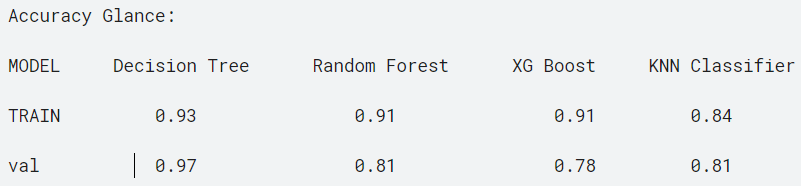

# Importing the test data


In [81]:
test_df=pd.read_csv("test.csv",na_values=['.',':','?','!','@','#','$','%','^','&','*',','])

In [82]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [83]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [84]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [85]:
test_df.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [86]:
label = test_df.filter(["PassengerId"], axis=1)
label

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [87]:
test_df = test_df.drop(["Name","Ticket","Fare","Cabin","PassengerId"], axis=1)

In [88]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [89]:
test_df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [90]:
for col in ['Pclass','Sex','Embarked']:
    test_df[col] = test_df[col].astype('category')

In [91]:
test_df.dtypes

Pclass      category
Sex         category
Age          float64
SibSp          int64
Parch          int64
Embarked    category
dtype: object

## Imputation

In [92]:
test_num_imp = pd.DataFrame(imputer_num.transform(test_df[num_cols]), columns=(test_df[num_cols]).columns)

In [93]:
test_num_imp.isnull().sum()

Age      0
SibSp    0
Parch    0
dtype: int64

In [94]:
test_cat_imp = pd.DataFrame(imputer_cat.transform(test_df[cat_cols]), columns=(test_df[cat_cols]).columns)

In [95]:
test_cat_imp.isnull().sum()

Pclass      0
Sex         0
Embarked    0
dtype: int64

## Standardization

In [96]:
test_num_std = pd.DataFrame(scaler.transform(test_num_imp), columns=(test_num_imp).columns)
test_num_std

,Age,SibSp,Parch
0,0.393300,-0.464774,-0.465958
1,1.277750,0.412663,-0.465958
2,2.339089,-0.464774,-0.465958
3,-0.137370,-0.464774,-0.465958
4,-0.491150,0.412663,0.796180
...,...,...,...
413,-0.137370,-0.464774,-0.465958
414,0.711702,-0.464774,-0.465958
415,0.676324,-0.464774,-0.465958
416,-0.137370,-0.464774,-0.465958


## Dummification

In [97]:
test_cat_dum = pd.get_dummies((test_cat_imp), drop_first=True)
test_cat_dum

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1,1,1,0
1,0,1,0,0,1
2,1,0,1,1,0
3,0,1,1,0,1
4,0,1,0,0,1
...,...,...,...,...,...
413,0,1,1,0,1
414,0,0,0,0,0
415,0,1,1,0,1
416,0,1,1,0,1


In [98]:
test_num_std = test_num_std.reset_index()
test_num_std

,index,Age,SibSp,Parch
0,0,0.393300,-0.464774,-0.465958
1,1,1.277750,0.412663,-0.465958
2,2,2.339089,-0.464774,-0.465958
3,3,-0.137370,-0.464774,-0.465958
4,4,-0.491150,0.412663,0.796180
...,...,...,...,...
413,413,-0.137370,-0.464774,-0.465958
414,414,0.711702,-0.464774,-0.465958
415,415,0.676324,-0.464774,-0.465958
416,416,-0.137370,-0.464774,-0.465958


In [99]:
test_num_std = test_num_std.drop(["index"], axis=1)
test_num_std

,Age,SibSp,Parch
0,0.393300,-0.464774,-0.465958
1,1.277750,0.412663,-0.465958
2,2.339089,-0.464774,-0.465958
3,-0.137370,-0.464774,-0.465958
4,-0.491150,0.412663,0.796180
...,...,...,...
413,-0.137370,-0.464774,-0.465958
414,0.711702,-0.464774,-0.465958
415,0.676324,-0.464774,-0.465958
416,-0.137370,-0.464774,-0.465958


In [100]:
test_cat_dum = test_cat_dum.reset_index()
test_cat_dum

,index,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,0,1,1,1,0
1,1,0,1,0,0,1
2,2,1,0,1,1,0
3,3,0,1,1,0,1
4,4,0,1,0,0,1
...,...,...,...,...,...,...
413,413,0,1,1,0,1
414,414,0,0,0,0,0
415,415,0,1,1,0,1
416,416,0,1,1,0,1


In [101]:
test_cat_dum = test_cat_dum.drop(["index"], axis=1)
test_cat_dum

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1,1,1,0
1,0,1,0,0,1
2,1,0,1,1,0
3,0,1,1,0,1
4,0,1,0,0,1
...,...,...,...,...,...
413,0,1,1,0,1
414,0,0,0,0,0
415,0,1,1,0,1
416,0,1,1,0,1


## Concating

In [102]:
Final_test_df = pd.concat([test_num_std,test_cat_dum], axis=1)
Final_test_df

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.393300,-0.464774,-0.465958,0,1,1,1,0
1,1.277750,0.412663,-0.465958,0,1,0,0,1
2,2.339089,-0.464774,-0.465958,1,0,1,1,0
3,-0.137370,-0.464774,-0.465958,0,1,1,0,1
4,-0.491150,0.412663,0.796180,0,1,0,0,1
...,...,...,...,...,...,...,...,...
413,-0.137370,-0.464774,-0.465958,0,1,1,0,1
414,0.711702,-0.464774,-0.465958,0,0,0,0,0
415,0.676324,-0.464774,-0.465958,0,1,1,0,1
416,-0.137370,-0.464774,-0.465958,0,1,1,0,1


In [103]:
Final_test_df.isnull().sum()

Age           0
SibSp         0
Parch         0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

# Model prediction on test data
## KNN Classifier

In [104]:
knn_2_preds = knn.predict(Final_test_df)
knn_2_preds[0:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [105]:
len(knn_2_preds)

418

In [106]:
label["Survived"] = knn_2_preds
label["Survived"][0:10]

0    0
1    0
2    0
3    0
4    1
5    0
6    1
7    0
8    1
9    0
Name: Survived, dtype: int64

In [107]:
label

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [108]:
label = label.set_index(["PassengerId"])
label

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [109]:
label.to_csv('/kaggle/working/submission.csv')